Requesting McDonalds...0.15s [DONE]
Requesting Fedex...0.15s [DONE]
Requesting Chipotle...0.15s [DONE]
Requesting Microsoft...0.16s [DONE]
Requesting Disney...0.16s [DONE]
Requesting Tesla...0.15s [DONE]
Requesting Google...0.25s [DONE]
Requesting Facebook...0.19s [DONE]
Requesting Amazon...0.19s [DONE]


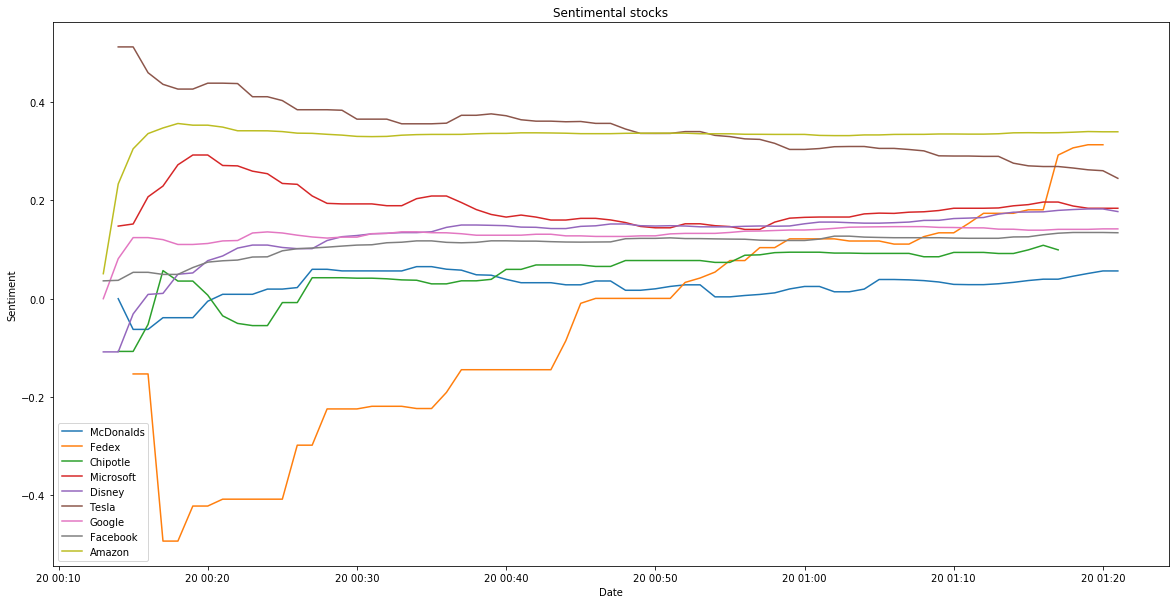

In [22]:
#!/bin/python
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as pltdates
import requests
import time
from scipy import signal

# Get the window of values
hours = 12
before = int(time.time())
after = before - hours*3600

companies = ["McDonalds", 
             "Fedex", 
             "Chipotle", 
             "Microsoft", 
             "Disney", 
             "Tesla", 
             "Google", 
             "Facebook",
             "Amazon",
            ]

plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.set_xlabel("Date")
ax.set_ylabel("Sentiment")
ax.set_title("Sentimental stocks")

for company in companies:
    print(f"Requesting {company}...", end="")
    start = time.time()
    r = requests.get(f"http://167.172.114.123:5050/api/sentiments?company={company}&before={before}&after={after}")
    values = r.json()
    x_vals = [datetime.fromtimestamp(x[0]) for x in values]
    y_vals = [x[1] for x in values]
    ax.plot_date(pltdates.date2num(x_vals), signal.medfilt(y_vals),
                 label=company, linestyle='solid', marker=None)
    print(f"{round(time.time()-start,2)}s [\033[92mDONE\033[0m]")

ax.legend()
ax.plot()
plt.show()